In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
def multiply_matrices(A, B):
    compare = assign = 0
    N = A.shape[0]

    result = np.zeros_like(A)

    for i in range(N):
        for j in range(N):
            for k in range(N):
                compare += 1
                result[i][j] += A[i][k] * B[k][j]
                assign += 1
            compare += 2
        compare += 2
    compare += 1
    assign += 2

    return result, compare, assign

In [4]:
def split_matrix(M):
    assign = 0
    row, col = M.shape
    r, c = row//2, col//2
    assign += 4
    return M[:r, :c], M[:r, c:], M[r:, :c], M[r:, c:], assign

In [5]:
def strass(A, B): 
    compare = assign = 0
    def strassen(A, B):
        compare = assign = 0
        # Base case when size of matrices is 1x1
        compare += 1
        if len(A) == 1:
            return A * B, compare, assign
    
        # Splitting the matrices into quadrants. This will be done recursively
        # untill the base case is reached.
        A11, A12, A21, A22, assignA = split_matrix(A)
        B11, B12, B21, B22, assignB = split_matrix(B)
    
        # Computing the 7 products, recursively (p1, p2...p7)
        P1, compare1, assign1 = strassen(A11 + A22, B11 + B22)  
        P2, compare2, assign2 = strassen(A21 + A22, B11)        
        P3, compare3, assign3 = strassen(A11, B12 - B22)        
        P4, compare4, assign4 = strassen(A22, B21 - B11)        
        P5, compare5, assign5 = strassen(A11 + A12, B22)        
        P6, compare6, assign6 = strassen(A21 - A11, B11 + B12)  
        P7, compare7, assign7 = strassen(A12 - A22, B21 + B22)  
    
        # Computing the values of the 4 quadrants of the final matrix c
        C11 = P1 + P4 - P5 + P7
        C12 = P3 + P5           
        C21 = P2 + P4            
        C22 = P1 + P3 - P2 + P6
    
        # Combining the 4 quadrants into a single matrix by stacking horizontally and vertically.
        C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22)))) 
        compare += (compare1 + compare2 + compare3 + compare4 + compare5 + compare6 + compare7)
        assign += (assign1 + assign2 + assign3 + assign4 + assign5 + assign6 + assign7 + assignA + assignB)
        return C, compare, assign
    result, compare_temp, assign_temp = strassen(A, B)
    compare += compare_temp
    assign += assign_temp
    return result, compare, assign

In [6]:
def main():
    ''' 
    ******************************************
    *               Exercise 1               *
    ******************************************
    '''
    print(" "*15+"Exercise 1")
    print("*"*40)
    # Classic Method
    # Example
    N = 2**2
    A = np.random.randint(1, 1000, size=(N,N))
    B = np.random.randint(1, 1000, size=(N,N))
    print(">> Matrix A: \n", A)
    print(">> Matrix B: \n", B)

    print("\n@ Classic Method")
    AB, _, _ = multiply_matrices(A, B)
    print(">> Result of multiplication between A and B: \n", AB)

   # Strassen Method
    print("\n@ Strassen Method")
    AB_strass, _, _ = strass(A, B)
    print(">> Result of multiplication between A and B: \n", AB_strass)
    print("\n@ Compare with result of built-in function: \n", np.matmul(A, B))


    # Init list of A, B, N 
    NN = [2**k for k in range(2,8+1)]
    AA = np.array([np.random.randint(1, 1000, size=(n,n)) for n in NN])
    BB = np.array([np.random.randint(1, 1000, size=(n,n)) for n in NN])

    # Show plot to compare with O(N^2)
    temp = np.array([multiply_matrices(A, B) for (A, B) in zip(AA, BB)])
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(NN, (NN)**(np.log2(7)))
    ax.plot(NN, NN**(np.int64(3)), linewidth=5, color='gold')
    ax.plot(NN, temp[:,2], color = 'red')
    ax.plot(NN, temp[:,1], color = 'green')
    ax.set(xlabel="N")
    ax.legend(["O(N^log7)", "O(N^3)", "assign", "compare"])
    plt.savefig("classic_method.jpg")
    plt.show()

    temp = np.array([strass(A, B) for (A, B) in zip(AA, BB)])
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(NN, (NN)**(np.log2(7)))
    ax.plot(NN, NN**(np.int64(3)))
    ax.plot(NN, temp[:,2], color = 'red')
    ax.plot(NN, temp[:,1], color = 'green')
    ax.set(xlabel="N")
    ax.legend(["O(N^log7)", "O(N^3)", "assign", "compare"])
    plt.savefig("strass_method.jpg")
    plt.show()


               Exercise 1
****************************************
>> Matrix A: 
 [[ 37 917  36 399]
 [873 174 214 369]
 [672 771 914  45]
 [437 728 587 544]]
>> Matrix B: 
 [[400 635 584 831]
 [754 936 533 391]
 [555 659 526 204]
 [569 184 769 732]]

@ Classic Method
>> Result of multiplication between A and B: 
 [[ 953229  978947  836136  688706]
 [ 809127  926141  998899 1107261]
 [1383009 1758982 1318760 1079289]
 [1359033 1445832 1370330 1165751]]

@ Strassen Method
>> Result of multiplication between A and B: 
 [[ 953229  978947  836136  688706]
 [ 809127  926141  998899 1107261]
 [1383009 1758982 1318760 1079289]
 [1359033 1445832 1370330 1165751]]

@ Compare with result of built-in function: 
 [[ 953229  978947  836136  688706]
 [ 809127  926141  998899 1107261]
 [1383009 1758982 1318760 1079289]
 [1359033 1445832 1370330 1165751]]


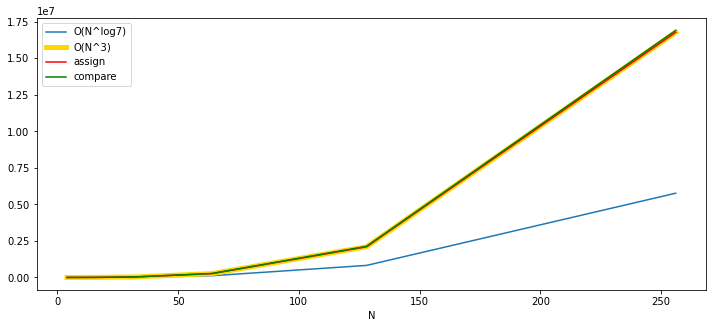

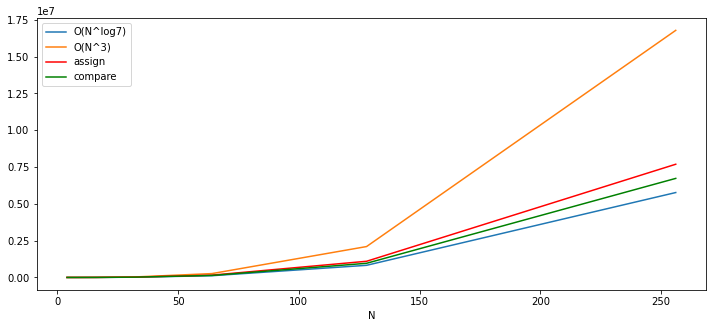

In [7]:
if __name__ == '__main__':
    main()